In [ ]:
# Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line:
#       (generated with Microsoft Copilot) or (source: link_to_source)

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
df = pd.read_json('../data/df_repos_counts.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   repo_owner                    201 non-null    object
 1   repo_name                     201 non-null    object
 2   source_code_comments          201 non-null    int64 
 3   source_code                   201 non-null    int64 
 4   source_code_cleaned_comments  201 non-null    int64 
 5   source_code_cleaned           201 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.6+ KB


In [4]:
df.head(5)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned
0,facebook,chisel,207143,173666,105073,95435
1,microsoft,Swin-Transformer,274996,227911,183265,145440
2,openai,point-e,191920,149995,109180,85260
3,THUDM,ChatGLM3,194864,163924,121821,103466
4,PacktPublishing,Deep-Reinforcement-Learning-Hands-On,477700,334898,164834,122607


In [5]:
df['comments'] = df['source_code_comments'] - df['source_code']
df['formatting'] = df['source_code'] - df['source_code_cleaned']  # characters which werde removed to get clean code with comments
df['sum'] = df['comments'] + df['formatting'] + df['source_code_cleaned']

df.head(10)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
0,facebook,chisel,207143,173666,105073,95435,33477,78231,207143
1,microsoft,Swin-Transformer,274996,227911,183265,145440,47085,82471,274996
2,openai,point-e,191920,149995,109180,85260,41925,64735,191920
3,THUDM,ChatGLM3,194864,163924,121821,103466,30940,60458,194864
4,PacktPublishing,Deep-Reinforcement-Learning-Hands-On,477700,334898,164834,122607,142802,212291,477700
5,tornadoweb,tornado,1668943,376000,1025631,229413,1292943,146587,1668943
6,tatsu-lab,stanford_alpaca,29258,22603,19567,14592,6655,8011,29258
7,browser-use,browser-use,724041,470105,601270,399934,253936,70171,724041
8,dennybritz,cnn-text-classification-tf,19056,16407,14555,12389,2649,4018,19056
9,amoffat,sh,128016,37486,79743,21560,90530,15926,128016


In [6]:
df.describe()

,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02
mean,7.003162e+05,3.996775e+05,4.093543e+05,2.253970e+05,3.006387e+05,1.742805e+05,7.003162e+05
std,1.078599e+06,5.751964e+05,6.287267e+05,3.161087e+05,6.977339e+05,2.721028e+05,1.078599e+06
min,2.055000e+03,1.388000e+03,1.477000e+03,9.520000e+02,3.000000e+02,2.620000e+02,2.055000e+03
25%,9.425300e+04,6.669400e+04,5.305000e+04,3.615600e+04,1.933200e+04,2.690100e+04,9.425300e+04
50%,2.420580e+05,1.708100e+05,1.579040e+05,1.000990e+05,6.217400e+04,7.215900e+04,2.420580e+05
75%,7.831570e+05,4.513290e+05,4.942710e+05,2.521420e+05,2.175480e+05,1.856980e+05,7.831570e+05
max,7.469367e+06,3.255793e+06,4.145578e+06,1.900209e+06,6.279728e+06,1.778594e+06,7.469367e+06


In [7]:
df[df['repo_name'] == '']

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum


In [8]:
df[df['repo_owner'] == '']

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum


In [9]:
df.sort_values('source_code_comments').head(20)

,repo_owner,repo_name,source_code_comments,source_code,source_code_cleaned_comments,source_code_cleaned,comments,formatting,sum
31,openstack,openstack,2055,1388,1477,952,667,436,2055
148,Taniiishk,Rock-Paper-Scissors-Game,2435,2135,2133,1873,300,262,2435
159,crazyguitar,pysheeet,7480,6660,5707,4992,820,1668,7480
129,majumderb,rezero,7519,4416,5645,3299,3103,1117,7519
80,diego-vicente,som-tsp,7670,5865,5778,4293,1805,1572,7670
188,realpython,cookiecutter-flask-skeleton,9234,8474,7394,6695,760,1779,9234
102,andkret,Cookbook,9729,4550,7942,3537,5179,1013,9729
38,JakeWharton,pidcat,12800,10931,6363,7433,1869,3498,12800
109,lennylxx,ipv6-hosts,13680,12735,5388,6296,945,6439,13680
132,sebastianruder,NLP-progress,13681,10453,8652,6258,3228,4195,13681


In [10]:
df_2 = df[['repo_name', 'source_code_cleaned', 'comments', 'formatting']]

In [11]:
df_2.head(10)

,repo_name,source_code_cleaned,comments,formatting
0,chisel,95435,33477,78231
1,Swin-Transformer,145440,47085,82471
2,point-e,85260,41925,64735
3,ChatGLM3,103466,30940,60458
4,Deep-Reinforcement-Learning-Hands-On,122607,142802,212291
5,tornado,229413,1292943,146587
6,stanford_alpaca,14592,6655,8011
7,browser-use,399934,253936,70171
8,cnn-text-classification-tf,12389,2649,4018
9,sh,21560,90530,15926


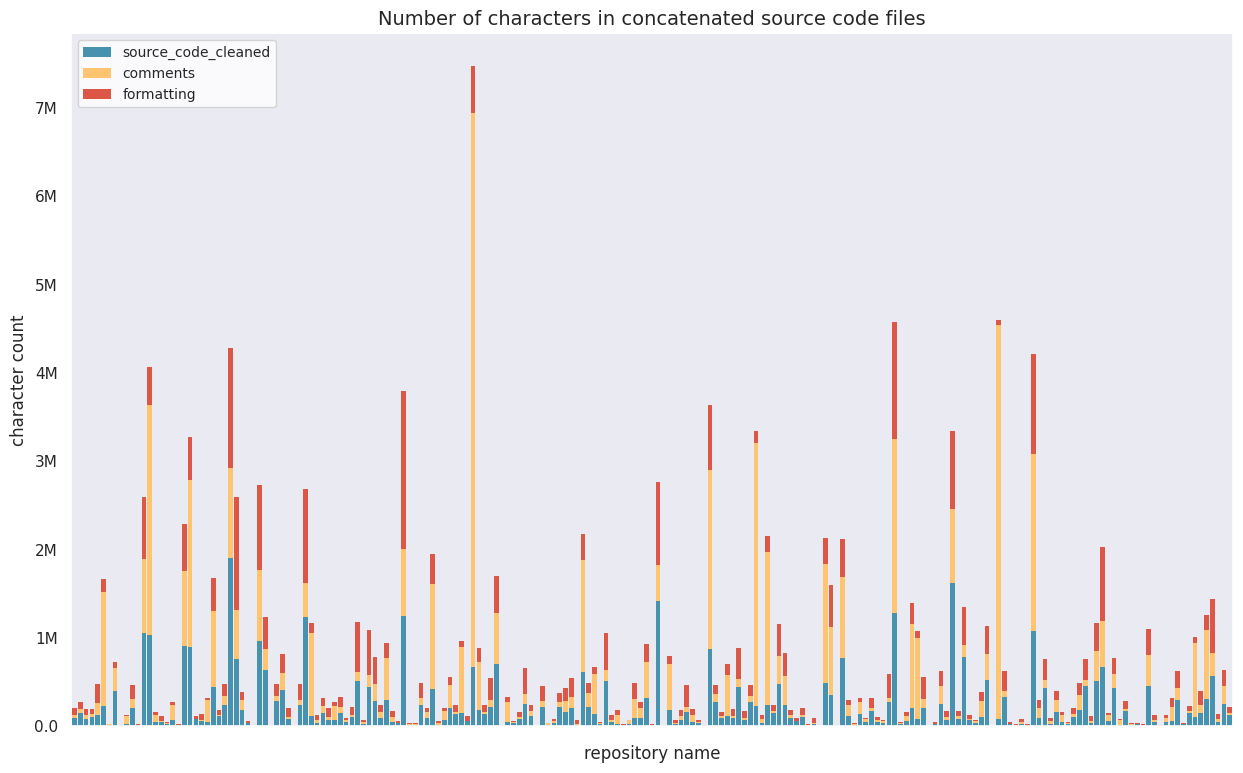

In [12]:
colors = ['#4793AF', '#FFC470', '#DD5746']

def format_yaxis(value, _): # (generated with Microsoft Copilot)
    if value >= 1_000_000:
        return f'{int(value / 1_000_000)}M'  # f'{value / 1_000_000:.1f}M' --> if i want a decimal number
    elif value >= 1_000:
        return f'{int(value / 1_000)}k'  # f'{value / 1_000:.1f}k' --> if i want a decimal number
    return str(value)


with sns.axes_style('white'):
    sns.set_theme(style='dark')
    fig, ax = plt.subplots(figsize=(15, 9))
    df_2.set_index('repo_name').plot(kind='bar', stacked=True, ax=ax, width=0.8, edgecolor='none', color=colors) #edgecolor='none'

    ax.set_title('Number of characters in concatenated source code files', fontdict={'fontsize': 14})
    ax.set_xlabel('repository name')
    ax.set_ylabel('character count')
    ax.yaxis.set_major_formatter(FuncFormatter(format_yaxis))
    ax.set_xticklabels([])
    plt.legend(loc=2, fontsize=10, facecolor='white')
    plt.grid(visible=False)
    plt.show()

    sns.reset_defaults()



## Filter repositories and remove duplicates

In [13]:
repos_exclude = [('ccxt', 'ccxt'), ('bbfamily', 'abu'), ('lonePatient', 'awesome-pretrained-chinese-nlp-models'), ('Lcry', 'a-sheep-assistant'),('eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee', 'eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee')] 

In [14]:
df_filtered = df[~df.set_index(['repo_owner', 'repo_name']).index.isin(repos_exclude)]

In [15]:
len(df_filtered)

201

In [16]:
counts = df_filtered.groupby(['repo_owner', 'repo_name']).size().reset_index(name='count')

In [17]:
duplicates = counts[counts['count'] > 1]

In [18]:
duplicates

,repo_owner,repo_name,count


In [ ]:
# tmp_df = pd.DataFrame(columns=['idx', 'repo_owner', 'repo_name'])

# for index, row in duplicates.iterrows():
#     new_entry = {
#         'idx': df_filtered[df_filtered['repo_owner'] == row['repo_owner']].index[0],
#         'repo_owner': row['repo_owner'],
#         'repo_name': row['repo_name']
#     }
#     tmp_df = pd.concat([tmp_df, pd.DataFrame([new_entry])], ignore_index=True)

In [ ]:
#idx_exclude = tmp_df['idx'].to_list()

In [ ]:
#df_filtered = df_filtered[~df_filtered.index.isin(idx_exclude)]

In [ ]:
#len(df_filtered)

189

## Order repository counts ascending

In [19]:
df_to_save = df_filtered.sort_values('source_code_cleaned_comments',ascending=True)


In [20]:
df_to_save.to_json('../data/df_repos_counts_filtered.json', orient='records')

## token count

In [ ]:
# num_chars_comments = df['source_code_cleaned_comments'].sum() # 241668429
# num_chars = df['source_code_cleaned'].sum() # 158566733

In [ ]:
# num_tokens_comments = num_chars_comments / 3.99 # 60568528.57
# num_tokens = num_chars / 3.99 # 39741035.84

In [ ]:
# num_days_comments = num_tokens_comments / 1000000 # 61
# num_days = num_tokens/ 1000000 # 39

In [ ]:
# num_days

39.741035839599